In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [121]:
data = pd.read_csv('../data/reports/details/DBA_2J-mapped_200_2_20_all.csv', names=['Chr','Type','Size'], header=None).sort_values(by=['Size'])

size_bps = [50,100,1000,10000,100000,1000000]

all_boxes = [15,30,35,40]
for idx, val in enumerate(size_bps):
    if idx==0:
        continue
    else:
        all_boxes.extend(np.linspace(size_bps[idx-1], val, num=10, endpoint=False, dtype = int))
all_boxes.append(1000000)
all_boxes.append(2000000)

data['SizeBin'] = pd.cut(x=data['Size'], bins=all_boxes)
grouped_data=data.groupby(["SizeBin","Type"])["SizeBin"].count().unstack("Type").fillna(0)

x=[]
for interval in grouped_data['DEL'].index.array:
    x.append(interval.left)

deletions=np.array(grouped_data['DEL'].values)
insertions=np.array(grouped_data['INS'].values)

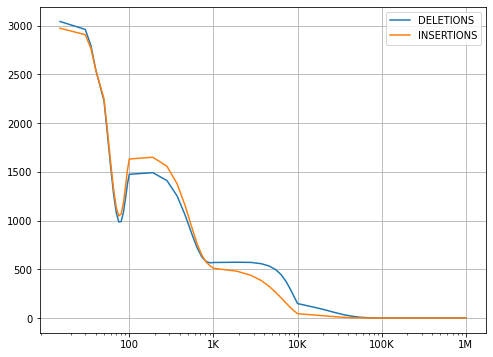

In [125]:
y1 = gaussian_filter1d(deletions, sigma=3)
y2 = gaussian_filter1d(insertions, sigma=3)

plt.figure(figsize=(8,6))
plt.xscale('log')
plt.plot(x, y1, label = "DELETIONS")
plt.plot(x, y2, label = "INSERTIONS")

positions = [100,1000,10000,100000,1000000]
labels = ["100", "1K", "10K", "100K", "1M"]
plt.xticks(ticks=positions, labels=labels)

plt.legend()
plt.grid()

plt.show()